In [1]:
import os
import glob
import cv2
import shutil # file operation tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

!pip install kaggle
from google.colab import files

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
# Load Data from Kaggle to directory
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir -p /content/drive/MyDrive/projet/dataset
!kaggle datasets download -d sujaykapadnis/smoking -p /content/drive/MyDrive/projet/dataset
!unzip -q /content/drive/MyDrive/projet/dataset/smoking.zip -d /content/drive/MyDrive/projet/dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/smoking
License(s): Attribution 4.0 International (CC BY 4.0)
 77% 49.0M/63.8M [00:00<00:00, 116MB/s]
100% 63.8M/63.8M [00:00<00:00, 111MB/s]


In [8]:
# Labeling File

# Getting the file paths
train_files = glob.glob('/content/drive/MyDrive/projet/dataset/Training/Training/*')

# Define labels from file paths
labels = []
for file_path in train_files:
    file_name = os.path.basename(file_path)
    if "smoking" in file_name.lower() and "notsmoking" not in file_name.lower(): # memisahkan label file secara spesifik
        labels.append("smoking")
    else:
        labels.append("not-smoking")

In [9]:
# Extract image sizes

image_sizes = []
image_sizes_kb = []
for file_path in train_files:
    # Read the image and get its size
    img = cv2.imread(file_path)

    # Get the image height and width
    height, width, _ = img.shape
    image_sizes.append((height, width))

    # Get the image file size in bytes
    file_size_bytes = os.path.getsize(file_path)
    file_size_kb = file_size_bytes / (1024.0) # Convert file size to kilobytes (KB)
    image_sizes_kb.append(file_size_kb)

In [10]:
# Create DataFrame

df_train_file = pd.DataFrame({'file_path': train_files, 'label': labels, 'image_size': image_sizes, 'image_size_kb': image_sizes_kb})
df_train_file

,file_path,label,image_size,image_size_kb
0,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",70.416016
1,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",74.438477
2,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",82.737305
3,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",71.926758
4,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",44.441406
...,...,...,...,...
711,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",79.545898
712,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",75.612305
713,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",50.843750
714,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",78.681641


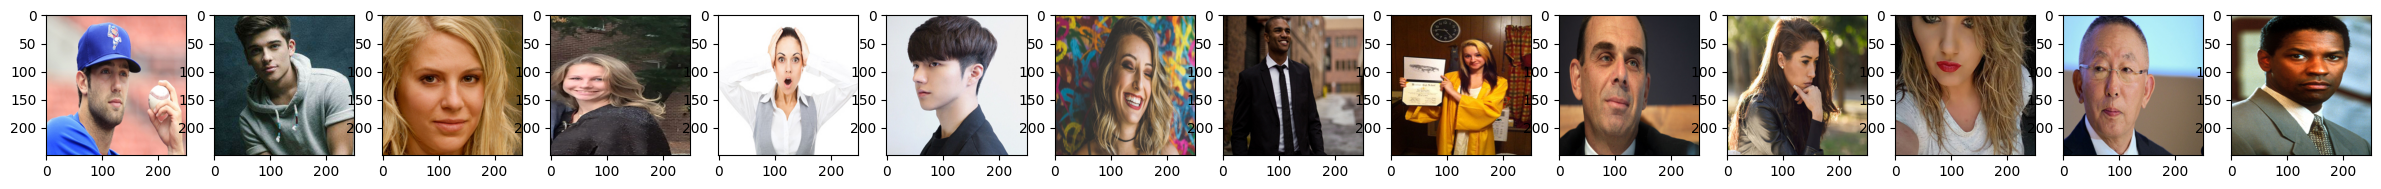

In [11]:
# Show images preview

fig, ax = plt.subplots(ncols=14, figsize=(30,3))
for i in range(14):
  train_images = plt.imread(train_files[i])
  ax[i].imshow(train_images)

In [12]:
# Separate and move image files into different folder

# Define the path to your main directory containing all images
train_images_directory = '/content/drive/MyDrive/projet/dataset/Training/Training'

# Create one main file that consist of two subdirectories
train_main_directory = '/content/drive/MyDrive/projet/dataset/Training'
main_subfile = os.path.join(train_main_directory, 'train_set')

# Create two subdirectories: one for smoking images and one for non-smoking images
smoking_directory = os.path.join(main_subfile, 'smoking')
not_smoking_directory = os.path.join(main_subfile, 'not_smoking')

# Create the subdirectories if they don't exist
os.makedirs(smoking_directory, exist_ok=True)
os.makedirs(not_smoking_directory, exist_ok=True)

# Get a list of all image file names in the main directory
all_images = os.listdir(train_images_directory)

# Loop through each image file and move it to the appropriate subdirectory
for image_name in all_images:
    if 'smoking' in image_name.lower() and "notsmoking" not in image_name.lower():
        shutil.copy(os.path.join(train_images_directory, image_name), os.path.join(smoking_directory, image_name))
    else:
        shutil.copy(os.path.join(train_images_directory, image_name), os.path.join(not_smoking_directory, image_name))

print("Images have been copied to separate subdirectories.")

Images have been copied to separate subdirectories.


In [13]:
# Separate and move image files into different folder

# Define the path to your main directory containing all images
val_images_directory = '/content/drive/MyDrive/projet/dataset/Validation/Validation'

# Create one main file that consist of two subdirectories
val_main_directory = '/content/drive/MyDrive/projet/dataset/Validation'
main_subfile = os.path.join(val_main_directory, 'val_set')

# Create two subdirectories: one for smoking images and one for non-smoking images
smoking_directory = os.path.join(main_subfile, 'smoking')
not_smoking_directory = os.path.join(main_subfile, 'not_smoking')

# Create the subdirectories if they don't exist
os.makedirs(smoking_directory, exist_ok=True)
os.makedirs(not_smoking_directory, exist_ok=True)

# Get a list of all image file names in the main directory
all_images = os.listdir(val_images_directory)

# Loop through each image file and move it to the appropriate subdirectory
for image_name in all_images:
    if 'smoking' in image_name.lower() and "notsmoking" not in image_name.lower():
        shutil.copy(os.path.join(val_images_directory, image_name), os.path.join(smoking_directory, image_name))
    else:
        shutil.copy(os.path.join(val_images_directory, image_name), os.path.join(not_smoking_directory, image_name))

print("Images have been copied to separate subdirectories.")

Images have been copied to separate subdirectories.


In [14]:
# Separate and move image files into different folder

# Define the path to your main directory containing all images
test_images_directory = '/content/drive/MyDrive/projet/dataset/Testing/Testing'

# Create one main file that consist of two subdirectories
test_main_directory = '/content/drive/MyDrive/projet/dataset/Testing'
main_subfile = os.path.join(test_main_directory, 'test_set')

# Create two subdirectories: one for smoking images and one for non-smoking images
smoking_directory = os.path.join(main_subfile, 'smoking')
not_smoking_directory = os.path.join(main_subfile, 'not_smoking')

# Create the subdirectories if they don't exist
os.makedirs(smoking_directory, exist_ok=True)
os.makedirs(not_smoking_directory, exist_ok=True)

# Get a list of all image file names in the main directory
all_images = os.listdir(test_images_directory)

# Loop through each image file and move it to the appropriate subdirectory
for image_name in all_images:
    if 'smoking' in image_name.lower() and "notsmoking" not in image_name.lower():
        shutil.copy(os.path.join(test_images_directory, image_name), os.path.join(smoking_directory, image_name))
    else:
        shutil.copy(os.path.join(test_images_directory, image_name), os.path.join(not_smoking_directory, image_name))

print("Images have been copied to separate subdirectories.")

Images have been copied to separate subdirectories.


In [15]:
# Define data directories
train_dir = '/content/drive/MyDrive/projet/dataset/Training/train_set'
val_dir = '/content/drive/MyDrive/projet/dataset/Validation/val_set'
test_dir = '/content/drive/MyDrive/projet/dataset/Testing/test_set'

In [16]:
# Generates batches of augmented data from a directory

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(250, 250),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    shuffle=False)

Found 716 images belonging to 2 classes.


In [17]:
# Show data type of variable `train_generator`

train_generator

In [18]:
# Index of category

train_generator.class_indices

{'not_smoking': 0, 'smoking': 1}

In [19]:
# Generates batches of augmented data from a directory

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(250, 250),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=False)

Found 180 images belonging to 2 classes.


In [20]:
# Index of category

val_generator.class_indices

{'not_smoking': 0, 'smoking': 1}

In [21]:
# Generates batches of augmented data from a directory

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = val_datagen.flow_from_directory(test_dir,
                                                 target_size=(250, 250),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 shuffle=False)

Found 224 images belonging to 2 classes.


In [22]:
# Train DataFrame

df_train_file

,file_path,label,image_size,image_size_kb
0,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",70.416016
1,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",74.438477
2,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",82.737305
3,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",71.926758
4,/content/drive/MyDrive/projet/dataset/Training...,not-smoking,"(250, 250)",44.441406
...,...,...,...,...
711,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",79.545898
712,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",75.612305
713,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",50.843750
714,/content/drive/MyDrive/projet/dataset/Training...,smoking,"(250, 250)",78.681641


In [23]:
# Save DataFrame into CSV

df_train_file.to_csv("/content/drive/MyDrive/projet/dataset/Training/df_train_images_file.csv")

In [24]:
df_train_file['label'].value_counts()


,count
label,
not-smoking,358
smoking,358


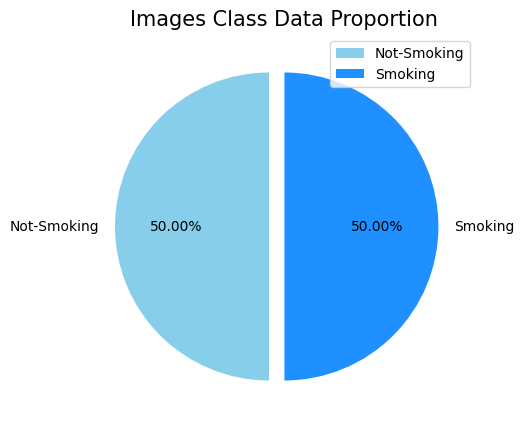

In [25]:
# Data class proportion

# Pie chart
labels = ['Not-Smoking', 'Smoking']
size = df_train_file['label'].value_counts()
colors = ['skyblue', 'dodgerblue']
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(10, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, startangle = 90, autopct = '%.2f%%')
plt.title('Images Class Data Proportion', fontsize = 15)
plt.legend()
plt.show()

In [26]:
# Calculate the average images size value
average_images_sizes = df_train_file.groupby('label')['image_size_kb'].mean()

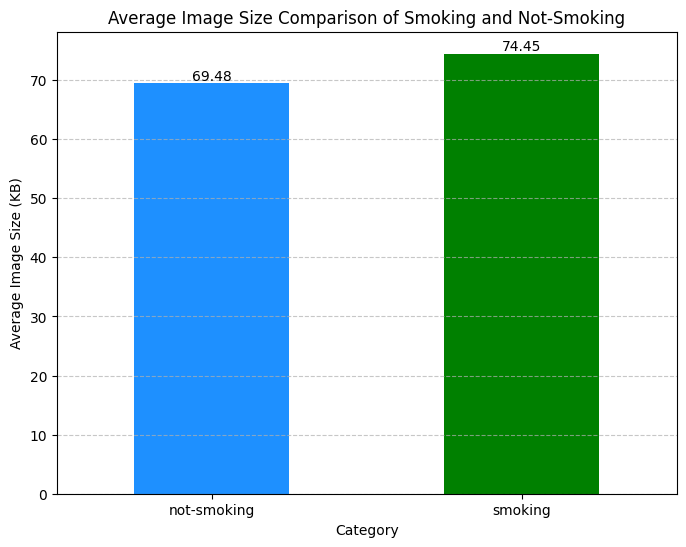

In [27]:
# Create histogram

plt.figure(figsize=(8, 6))
average_images_sizes.plot(kind='bar', color=['dodgerblue', 'green'])

# Add labels on top of each bar
for index, value in enumerate(average_images_sizes):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Average Image Size Comparison of Smoking and Not-Smoking')
plt.xlabel('Category')
plt.ylabel('Average Image Size (KB)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# Average all images size
average_all_images_sizes = df_train_file['image_size_kb'].mean()
average_all_images_sizes

71.96432955438199

In [29]:
# Build the CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')])

In [30]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

In [31]:
# Compile the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train the model

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32, # calculated by dividing the total number of samples in the training dataset by 32
                    epochs=25,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // 32)

Epoch 1/25
22/22 [==============================] - 70s 3s/step - loss: 0.7022 - accuracy: 0.5175 - val_loss: 0.6905 - val_accuracy: 0.5625
Epoch 2/25
22/22 [==============================] - 68s 3s/step - loss: 0.7147 - accuracy: 0.5234 - val_loss: 0.6871 - val_accuracy: 0.5625
Epoch 3/25
22/22 [==============================] - 67s 3s/step - loss: 0.6965 - accuracy: 0.2719 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 4/25
22/22 [==============================] - 67s 3s/step - loss: 0.6927 - accuracy: 0.5234 - val_loss: 0.6948 - val_accuracy: 0.4375
Epoch 5/25
22/22 [==============================] - 68s 3s/step - loss: 0.6943 - accuracy: 0.4766 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 6/25
22/22 [==============================] - 67s 3s/step - loss: 0.7004 - accuracy: 0.4766 - val_loss: 0.6914 - val_accuracy: 0.4375
Epoch 7/25
22/22 [==============================] - 67s 3s/step - loss: 0.6954 - accuracy: 0.4050 - val_loss: 0.6889 - val_accuracy: 0.6625
Epoch 8/25
22/22 [==

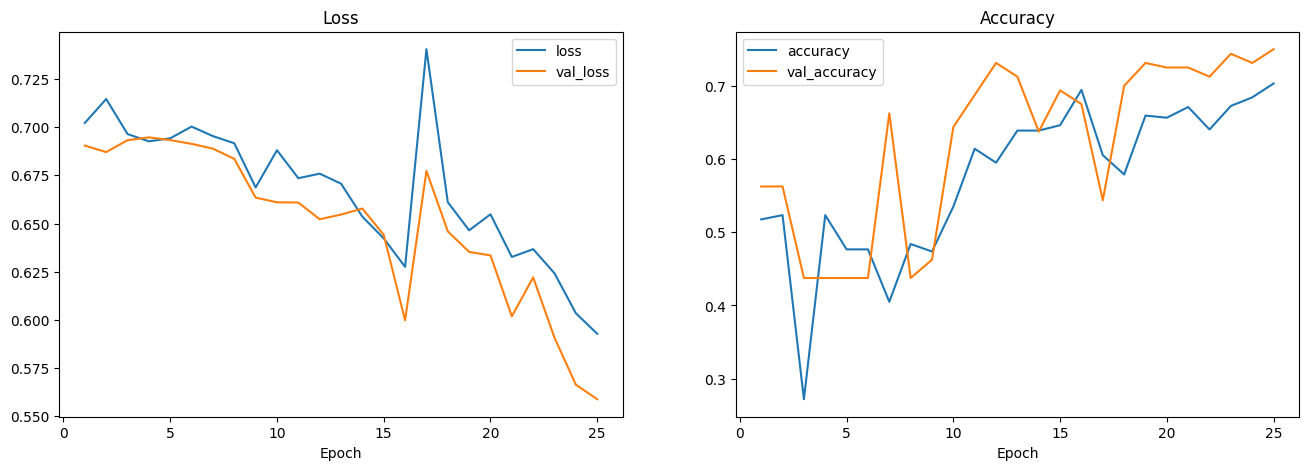

In [34]:
# Evaluation plot

epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

In [35]:
# Define data generators with data augmentation
train_optimize_datagen = ImageDataGenerator(rescale=1./255,
                                            rotation_range=20,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_optimize_generator = train_datagen.flow_from_directory(train_dir,
                                                             target_size=(250, 250),
                                                             batch_size=32,
                                                             class_mode='binary',
                                                             shuffle=False)

Found 716 images belonging to 2 classes.


In [36]:
# Build the model
model_optimize = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')])

In [37]:
# Compile the model
model_optimize.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [38]:
# Train the model
history = model_optimize.fit(train_generator,
                             steps_per_epoch=train_generator.samples // 32,
                             epochs=25,
                             validation_data=val_generator,
                             validation_steps=val_generator.samples // 32)

Epoch 1/25
22/22 [==============================] - 69s 3s/step - loss: 0.7039 - accuracy: 0.5029 - val_loss: 0.6856 - val_accuracy: 0.5625
Epoch 2/25
22/22 [==============================] - 68s 3s/step - loss: 0.6923 - accuracy: 0.5234 - val_loss: 0.6865 - val_accuracy: 0.5625
Epoch 3/25
22/22 [==============================] - 68s 3s/step - loss: 0.6915 - accuracy: 0.5556 - val_loss: 0.6848 - val_accuracy: 0.6250
Epoch 4/25
22/22 [==============================] - 67s 3s/step - loss: 0.6861 - accuracy: 0.5673 - val_loss: 0.6682 - val_accuracy: 0.7188
Epoch 5/25
22/22 [==============================] - 67s 3s/step - loss: 0.6799 - accuracy: 0.6345 - val_loss: 0.6314 - val_accuracy: 0.7312
Epoch 6/25
22/22 [==============================] - 67s 3s/step - loss: 0.7438 - accuracy: 0.4488 - val_loss: 0.6795 - val_accuracy: 0.6313
Epoch 7/25
22/22 [==============================] - 67s 3s/step - loss: 0.6867 - accuracy: 0.5921 - val_loss: 0.6866 - val_accuracy: 0.4375
Epoch 8/25
22/22 [==

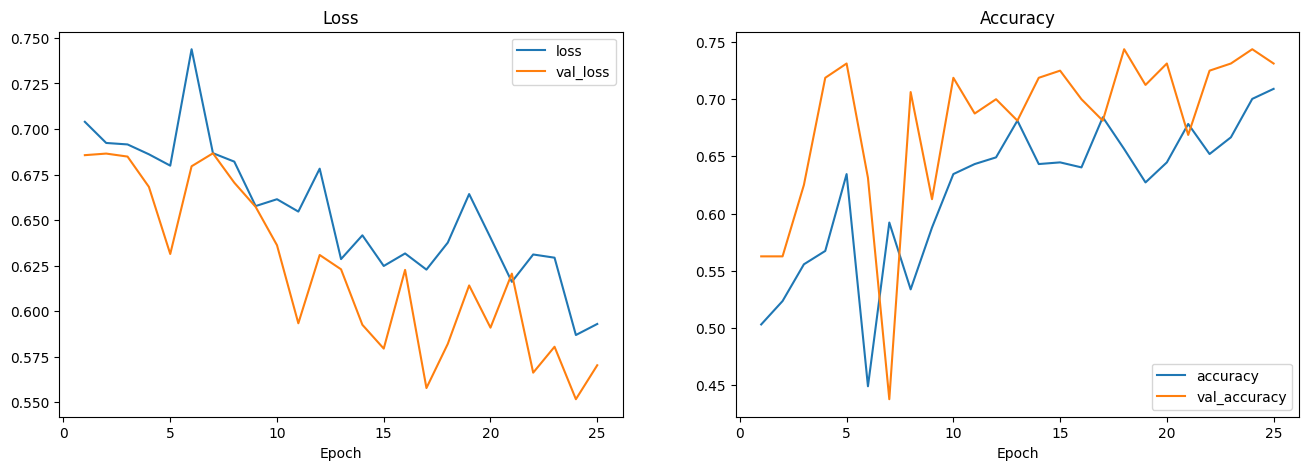

In [39]:
# Evaluation plot

epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

In [40]:
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_generator,
                                          steps=test_generator.samples // 32)

print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 6s 801ms/step - loss: 0.5950 - accuracy: 0.7098
Test Accuracy: 0.7098214030265808


In [41]:
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model_optimize.evaluate(test_generator,
                                          steps=test_generator.samples // 32)

print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 6s 854ms/step - loss: 0.6092 - accuracy: 0.6830
Test Accuracy: 0.6830357313156128


In [42]:
# Save the model
model_optimize.save("/content/drive/MyDrive/projet/CNN_smoking_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# Save the model
model_optimize.save("/content/drive/MyDrive/projet/CNN_smoking_model.keras")